In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
import scipy.stats as stats
from IPython.display import display
import pandas as pd
from utils import *
import scipy as sp
import scipy.integrate as integrate

# Simulation

In [2]:
def target_option(kn, r, n, x0, N, alpha_param, T):
    t = 1 / n
    dWt = np.random.normal(scale=np.sqrt(t), size=(N))
    def alpha(kn, x0, alpha1, alpha2):
        return alpha1 + alpha2 * np.cos(x0)
        # return alpha1+alpha2*1/(1+np.exp(-x0))
        # return 1
    return x0 + alpha(kn, x0, **alpha_param) *x0* dWt + r * x0 * t
@multi_thread_wrapper
@multi_input_wrapper
@compute_vanilla
def Algo_target_option(kn, r, n, x0, N, alpha_param, T):
    return target_option(kn, r, n, x0, N, alpha_param, T)

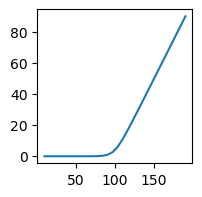

In [17]:
x0 = 100
Strike= np.linspace(10,190,100)
N = 10000
times=100
n=1000
r=0
T = 1
alpha_param={'alpha1':1,'alpha2':1}
alpha=0.05
Z=stats.norm.ppf(1-alpha/2)

fig,ax = plt.subplots(figsize=(2,2))
param_dict={'x0':np.array([x0]*N),'n':n,'N':N,'alpha_param':alpha_param,'r':r,'T':T}
yy=esperance_vanilla(times,r,Strike,T)(Algo_target_option)([param_dict])
ax.errorbar(Strike,np.mean(yy,axis = 1),np.std(yy,axis = 1)*Z/(np.sqrt(times*N)),ecolor='r')
plt.show()

In [18]:
Price = np.mean(yy,axis = 1)
Price_lower_bound=np.mean(yy,axis = 1)-np.std(yy,axis = 1)*Z/(np.sqrt(times*N))
Price_higher_bound=np.mean(yy,axis = 1)+np.std(yy,axis = 1)*Z/(np.sqrt(times*N))

In [19]:
Price_lower_bound

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -9.16978381e-08, -1.83708512e-06,
       -3.58247240e-06, -5.32785968e-06, -7.07324696e-06, -8.81863424e-06,
       -1.05640215e-05, -1.21333926e-05, -9.17435731e-06, -7.10816961e-06,
       -5.63287947e-06,  2.63701663e-05,  7.64568938e-05,  1.23143394e-04,
        2.11810745e-04,  5.96259056e-04,  9.69376483e-04,  1.33773594e-03,
        2.70530109e-03,  4.54521162e-03,  6.37173709e-03,  9.35314847e-03,
        1.65680061e-02,  2.37492586e-02,  3.09146461e-02,  5.13023724e-02,
        7.58321457e-02,  1.00321336e-01,  1.39875922e-01,  2.14062180e-01,
        2.88165091e-01,  3.62218599e-01,  5.44831767e-01,  7.46895666e-01,
        9.48864758e-01,  1.26698147e+00,  1.76553802e+00,  2.26392983e+00,
        2.76222086e+00,  3.71611688e+00,  4.70109282e+00,  5.68593578e+00,
        6.88012727e+00,  

# Vol implicit

In [14]:
def loss_BS(Strike, Price, x0, T, r, sigma):
    res=np.mean((Price - BS_Put(x0, Strike, T, r, sigma)) ** 2)
    print(res)
    return res
res = sp.optimize.minimize(fun=lambda x: loss_BS(Strike, Price, x0, T, r, x), x0=np.ones((Strike.shape[0],)), method="L-BFGS-B")

565.9324163822018
565.9324163822181
565.932416382247
565.9324163823054
565.9324163824098
565.9324163825792
565.9324163828344
565.9324163831982
565.9324163836935
565.9324163843434
565.9324163851699
565.9324163861946
565.9324163874376
565.9324163889174
565.9324163906506
565.932416392652
565.9324163949351
565.9324163975106
565.9324164003884
565.932416403576
565.9324164070792
565.9324164109028
565.9324164150493
565.9324164195203
565.9324164243164
565.9324164294364
565.9324164348785
565.9324164406396
565.9324164467158
565.9324164531025
565.9324164597947
565.932416466786
565.9324164740704
565.9324164816406
565.9324164894894
565.9324164976092
565.9324165059919
565.9324165146294
565.9324165235133
565.932416532635
565.9324165419856
565.9324165515569
565.93241656134
565.9324165713173
565.932416581487
565.9324165918421
565.932416602248
565.9324166126183
565.9324166231414
565.9324166338096
565.9324166380843
565.9324166418972
565.9324166457127
565.9324166469764
565.9324166454473
565.932416643846
56

In [15]:
res.success,res.fun

(True, 4.2114677338457604e-05)

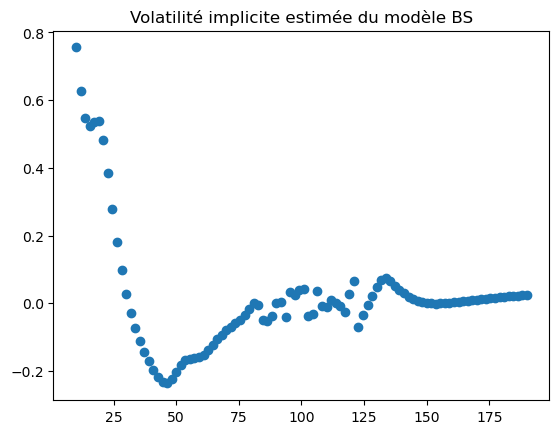

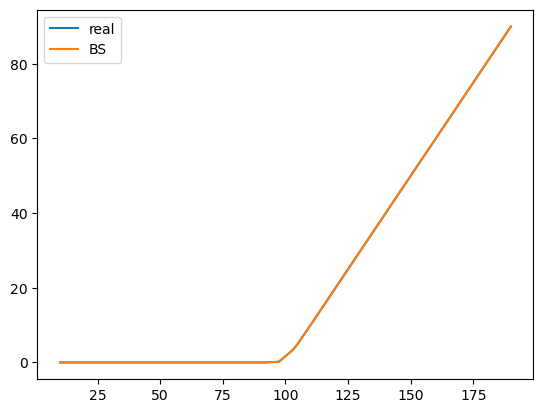

In [16]:
vol_imp_bs = res.x
plt.plot(Strike, vol_imp_bs, 'o')
plt.title("Volatilité implicite estimée du modèle BS")
plt.show()
plt.plot(Strike, Price, label="real")
plt.plot(Strike, BS_Put(x0, Strike, T, r, vol_imp_bs), label="BS")
plt.legend()
plt.show()

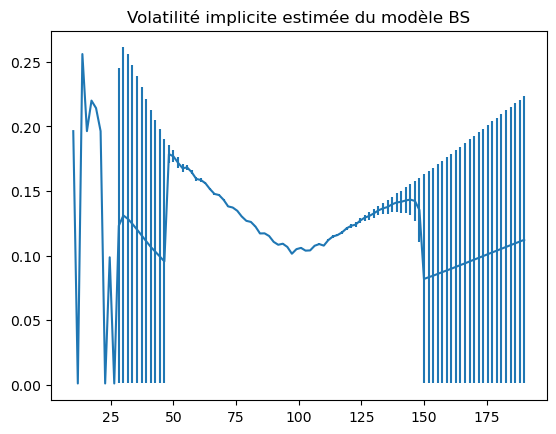

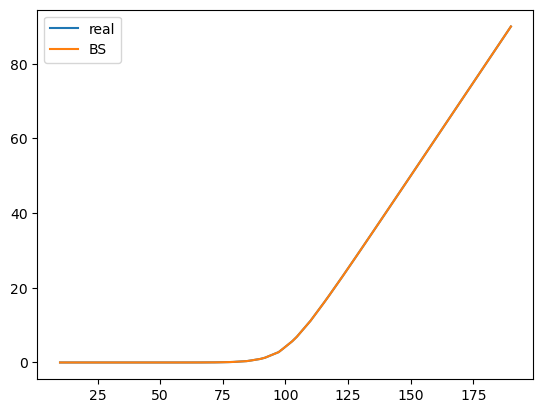

In [20]:
v_lower, _, _ = Dichotomic(Price_lower_bound, [np.ones_like(Strike) * 1e-3, np.ones_like(Strike) * 100], 1000)(BS_Put)(x0,Strike,T,r)
v_upper, _, _ = Dichotomic(Price_higher_bound, [np.ones_like(Strike) * 1e-3, np.ones_like(Strike) * 100], 1000)(BS_Put)(x0,Strike,T,r)
vol_imp_bs = (v_lower + v_upper) / 2
vol_imp_err_bs = np.abs(v_lower - v_upper) / 2
plt.errorbar(Strike, vol_imp_bs, vol_imp_err_bs)
plt.title("Volatilité implicite estimée du modèle BS")
plt.show()
plt.plot(Strike, Price, label="real")
plt.plot(Strike, BS_Put(x0, Strike, T, r, vol_imp_bs), label="BS")
plt.legend()
plt.show()

# Calibration price

In [57]:
def loss_Heston(Strike,Price,r,x1,T,x2,a,k,rho,sigma):
    res=np.mean([(Price[i] - Heston_Put(T,Strike[i],r,a,k,rho,sigma,x1,x2))**2 for i in range(Strike.shape[0])])
    print(res)
    return res

In [58]:
bounds=[(0, None),(1e-3, None),(None, None),(-1, 1),(1e-3, None)]
res = sp.optimize.minimize(fun = lambda x: loss_Heston(Strike,Price,r,np.log(x0),T,*x),x0 = [1e-3,1e-3,1e-3,-1,1],bounds=bounds,method="L-BFGS-B")

60.00742560888002
60.00742339752237
60.007424042315776
60.007425610083565
60.0074256551585
60.00742561168488
156.51699525965935
156.51699864360447
156.5169971855756
156.516993777271
156.51699620830166
156.51699377180609
14.857683790433864
14.857683742360374
14.857683612484077
14.857683770093853
14.857683350203832
14.857683941788867
12.243625234452605
12.243625437278313
12.243625250830855
12.243625185867689
12.243624901894593
12.24362531164691
8.658240732578763
8.658241114180472
8.658240901077912
8.658240667455672
8.65824058131388
8.658240733956688
4.464130421026584
4.464130557603786
4.464130470883013
4.464130402325834
4.464130309314117
4.464130436932583
2.105869026292163
2.105868754729051
2.1058688668082235
2.105869051986828
2.1058689373067914
2.1058690529995916
1.238086376372396
1.2380862023051973
1.2380862791968879
1.2380863929033157
1.2380863155429789
1.2380863872957146
0.3813900899419429
0.38139007105211953
0.3813900842927111
0.38139009221737596
0.38139006715360657
0.38139008467540

In [59]:
res.success,res.fun

(True, 0.007231267851811195)

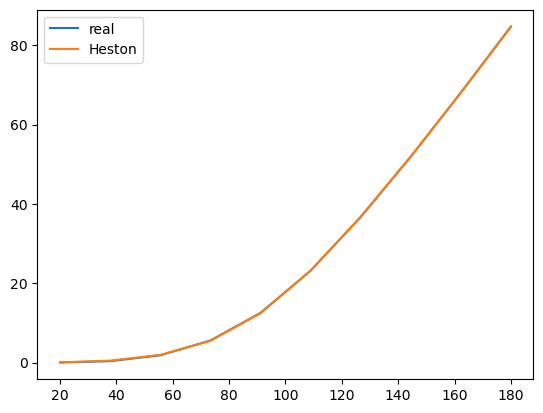

0.009040142090927183


In [60]:
v=res.x
x1 = np.log(x0)
x2 = v[0]
a = v[1]
k = v[2]
rho = v[3]
sigma = v[4]
plt.plot(Strike,Price,label = "real")
Price_heston=[Heston_Put(T,K,r,a,k,rho,sigma,x1,x2) for K in Strike]
plt.plot(Strike,Price_heston,label = "Heston")
plt.legend()
plt.show()
print(np.mean(((Price_heston - Price)**2)[Price<10]))

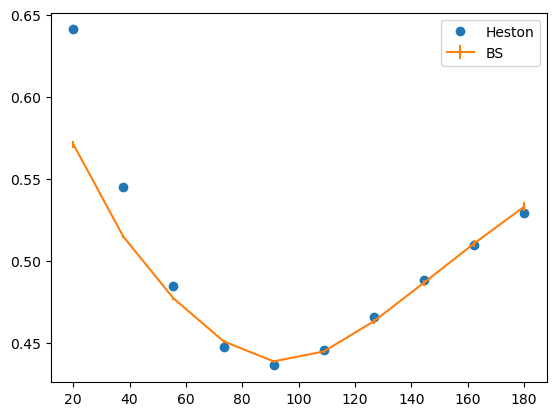

0.0005909809803955992


In [61]:
vol_imp_heston,_,_=Dichotomic(Price_heston, [np.ones_like(Strike) * 1e-3, np.ones_like(Strike) * 10], 1000)(BS_Put)(x0,Strike,T,r)
plt.plot(Strike, vol_imp_heston, 'o',label = "Heston")
plt.errorbar(Strike, vol_imp_bs, vol_imp_err_bs,label = "BS")
plt.legend()
plt.show()
print(np.mean((vol_imp_heston - vol_imp_bs)**2))

# Calibration vol implicit

In [48]:
def loss_Heston_vol(Strike,vol_imp_bs,r,x1,T,x2,a,k,rho,sigma):
    Price_heston = [Heston_Put(T,strike,r,a,k,rho,sigma,x1,x2) for strike in Strike]
    vol_imp_heston,_,_=Dichotomic(Price_heston, [np.ones_like(Strike) * 1e-3, np.ones_like(Strike) * 10], 1000)(BS_Put)(x0,Strike,T,r)
    res=np.mean((vol_imp_bs - vol_imp_heston)**2)
    print(res)
    return res

In [49]:
bounds=[(0, None),(1e-3, None),(None, None),(-1, 1),(1e-3, None)]
res = sp.optimize.minimize(fun = lambda x: loss_Heston_vol(Strike,vol_imp_bs,r,np.log(x0),T,*x),x0 = [1e-3,1e-3,1e-3,-1,1],bounds=bounds,method="L-BFGS-B")

0.15337602986253968
0.1533760174824002
0.15337602599886907
0.15337602987455876
0.15337603078043044
0.15337602986106322
0.2119030424781294
0.21190304618216507
0.21190304446285935
0.21190304069775306
0.211903042992645
0.21190304142959468
0.07505530598469749
0.07505531407522555
0.07505531344677496
0.07505530571523863
0.07505537117636647
0.07505530300477577
0.08709325207496937
0.08709325534177921
0.08709325504762187
0.08709325203351596
0.08709328011221787
0.08709325150837041
0.07714055968017744
0.07714055544686407
0.07714055493009353
0.07714055962856492
0.07714054724263472
0.07714056190656385
0.06411684679468921
0.06411683902742263
0.06411683850205192
0.06411684680232581
0.06411682507030111
0.06411685071980211
0.07732619089057018
0.07732617970595153
0.07732617914998208
0.07732619090173846
0.07732612684813531
0.0773261964034773
0.06386175247282568
0.06386175026812846
0.0638617497273798
0.06386175240439648
0.0638617670872808
0.06386175401297789
0.0742430065809585
0.07424301023104021
0.074243

In [53]:
res.success,res.fun

(True, 3.600403777997945e-05)

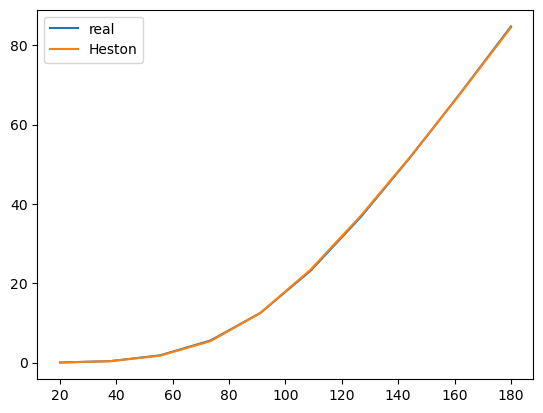

0.008716926522706205


In [56]:
v = res.x
x1 = np.log(x0)
x2 = v[0]
a = v[1]
k = v[2]
rho = v[3]
sigma = v[4]
plt.plot(Strike, Price, label="real")
Price_heston = [Heston_Put(T, K, r, a, k, rho, sigma, x1, x2) for K in Strike]
plt.plot(Strike, Price_heston, label="Heston")
plt.legend()
plt.show()
print(np.mean(((Price_heston - Price)**2)[Price<10]))

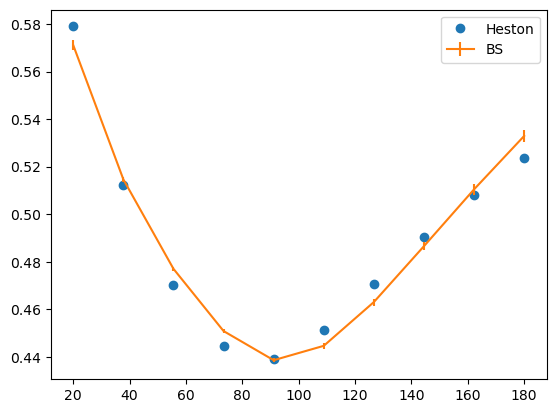

3.600403777997945e-05


In [55]:
vol_imp_heston, _, _ = Dichotomic(Price_heston, [np.ones_like(Strike) * 1e-3, np.ones_like(Strike) * 10], 1000)(BS_Put)(
    x0, Strike, T, r)
plt.plot(Strike, vol_imp_heston, 'o', label="Heston")
plt.errorbar(Strike, vol_imp_bs, vol_imp_err_bs, label="BS")
plt.legend()
plt.show()
print(np.mean((vol_imp_heston - vol_imp_bs)**2))